In [ ]:
# Connecting google drive to the current coding file.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
# Giving path of file to be loaded in the file.
file_path = '/content/drive/MyDrive/CAPSTONE PHASE 2/Unemployment_ Addressal and Mitigation_Final.xlsx'

In [ ]:
# Loading the file in df dataframe
df = pd.read_excel(file_path)

In [ ]:
# Checking the shape of initial dataset
df.shape

(302, 23)

In [ ]:
# List of columns that are unnecessary for our dataset.
columns_to_delete = ['Start time', 'Do you wish to participate in the survey?\n2','Completion time', 'Email','Name','Last modified time','Do you wish to participate in the survey?\n','Demographic Information\n',
                     'Question','Question2']

In [ ]:
# Creating a new subset with the unnecessary columns
subset_df = df[columns_to_delete]

In [ ]:
subset_df.head()

,Start time,Do you wish to participate in the survey?\n2,Completion time,Email,Name,Last modified time,Do you wish to participate in the survey?\n,Demographic Information\n,Question,Question2
0,2024-01-29 13:35:12,No,2024-01-29 13:35:23,anonymous,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-29 13:39:31,Yes,2024-01-29 13:40:38,anonymous,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-29 13:49:01,Yes,2024-01-29 13:49:51,anonymous,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-29 13:49:55,No,2024-01-29 13:49:57,anonymous,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-29 13:48:56,Yes,2024-01-29 13:50:02,anonymous,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
subset_df.nunique()

Start time                                      300
Do you wish to participate in the survey?\n2      2
Completion time                                 300
Email                                             1
Name                                              0
Last modified time                                0
Do you wish to participate in the survey?\n       0
Demographic Information\n                         0
Question                                          0
Question2                                         0
dtype: int64

In [ ]:
# Dropping all the unnecessary columns
df = df.drop(columns=columns_to_delete)

In [ ]:
# Renamimg the columns with a given name to decrease their column name length.
column_mapping = {
    'ID': 'Serial_Number',
    'Which age group best describes you ?\n': 'Age',
    'How do you describe your gender identity ?\n':'Gender',
    'What is the highest level of education you have completed?':'Education_level',
    'Are you currently enrolled in an educational program?':'Enrolment_status',
    'What is your current employment status?':'Employment_status',
    'Have you ever been employed in Canada ?':'Employment_history',
    'Please specify the type of employment.':'Employment_type',
    'What industry do you work in or previously worked in ?':'Industry_type',
    'If currently unemployed, what is the primary reason for your unemployment?':'Unemployment_factor',
    'How long have you been unemployed?':'Unemployment_tenure',
    'How are you currently searching for employment?':'Search_Type',
    'What is your number of years of work experience within inside or outside Canada?':'Years_of_experience'
}

# Rename the columns using the rename() method
df = df.rename(columns=column_mapping)

In [ ]:
# Checking for the sum of null values.
df.isnull().sum()

Serial_Number            0
Age                      7
Gender                   7
Education_level          7
Enrolment_status         7
Employment_status        7
Employment_history       7
Employment_type         92
Industry_type           92
Unemployment_factor    217
Unemployment_tenure    217
Search_Type              7
Years_of_experience     78
dtype: int64

In [ ]:
df.shape

(302, 13)

In [ ]:
df.head().T

,0,1,2,3,4
Serial_Number,1,2,3,4,5
Age,NaN,18-24,18-24,NaN,18-24
Gender,NaN,Female,Male,NaN,Female
Education_level,NaN,Bachelor's degree,Bachelor's degree,NaN,Bachelor's degree
Enrolment_status,NaN,"Yes, full-time","Yes, full-time",NaN,"Yes, full-time"
Employment_status,NaN,Self-employed,Employed full-time,NaN,Employed full-time
Employment_history,NaN,No,Yes,NaN,Yes
Employment_type,NaN,NaN,Full-time,NaN,Full-time
Industry_type,NaN,NaN,Information Technology (IT);,NaN,Banking/Finance;Arts and Entertainment;Informa...
Unemployment_factor,NaN,Job market conditions (difficulty finding suit...,NaN,NaN,NaN


In [ ]:
# List of column names from which we want to remove null values
columns_to_clean = ['Age', 'Gender', 'Education_level', 'Enrolment_status', 'Employment_status', 'Employment_history','Search_Type']

In [ ]:
# Remove rows with null values in the specified columns
df = df.dropna(subset=columns_to_clean)

In [ ]:
df.isnull().sum()

Serial_Number            0
Age                      0
Gender                   0
Education_level          0
Enrolment_status         0
Employment_status        0
Employment_history       0
Employment_type         85
Industry_type           85
Unemployment_factor    210
Unemployment_tenure    210
Search_Type              0
Years_of_experience     71
dtype: int64

In [ ]:
unique_values = df['Employment_status'].unique()

# Print the unique values
print(unique_values)

['Self-employed' 'Employed full-time' 'Employed part-time' 'Other'
 'Student' 'Retired' 'Student , not employed ' 'Unemployed'
 'looking for job' 'UnEmployed' 'Not Employed' 'unemployed' 'Student '
 'Job Searching' 'Searching for job' 'not employed' 'Unemployed '
 'Disabled or unable to work' 'Not employed in Canada' 'not working'
 'Jobless']


In [ ]:
df.shape

(295, 13)

## Breakage point

This converts the column into binary form to 0 and 1, corresponding to true and false situation

In [ ]:
# Now we will add a target column for unemployment for making our machine learning models.
df_ML = df
df_ML['Target_column'] = df_ML['Unemployment_factor'].isnull().astype(int)

In [ ]:
df_ML.head().T

,1,2,4,5,6
Serial_Number,2,3,5,6,7
Age,18-24,18-24,18-24,25-34,25-34
Gender,Female,Male,Female,Female,Female
Education_level,Bachelor's degree,Bachelor's degree,Bachelor's degree,High school graduate,Master's degree
Enrolment_status,"Yes, full-time","Yes, full-time","Yes, full-time","Yes, part-time","Yes, part-time"
Employment_status,Self-employed,Employed full-time,Employed full-time,Employed part-time,Employed part-time
Employment_history,No,Yes,Yes,Yes,No
Employment_type,NaN,Full-time,Full-time,Part-time,NaN
Industry_type,NaN,Information Technology (IT);,Banking/Finance;Arts and Entertainment;Informa...,Engineering;Healthcare/Medical;Marketing/Adver...,NaN
Unemployment_factor,Job market conditions (difficulty finding suit...,NaN,NaN,NaN,Seeking employment for the first time;


In [ ]:
value_counts = df_ML['Target_column'].value_counts()
value_counts

Target_column
1    210
0     85
Name: count, dtype: int64

Columns to consider for Machine learning:
1. Age
2. Gender
3. Education_level
4. Enrolment_status
5. Employment_history
6. Search_type
7. Years_of_Experience

In [ ]:
# Removing further unnecessary columns.
columns_to_delete_1 = ['Serial_Number', 'Employment_type','Industry_type', 'Unemployment_factor','Unemployment_tenure','Employment_history']
df_ML = df_ML.drop(columns=columns_to_delete_1)

In [ ]:
unique_counts = df_ML.nunique()
unique_counts

Age                      5
Gender                   2
Education_level          6
Enrolment_status         3
Employment_status       21
Search_Type            181
Years_of_experience     10
Target_column            2
dtype: int64

In [ ]:
# Encoding Gender as 0 and 1, 0 for females and 1 for males.
label_encoder = LabelEncoder()
df_ML['Gender_Encoded'] = label_encoder.fit_transform(df_ML['Gender'])

In [ ]:
# Applying one hot ecoding for converting education_level column values to making new column for each value
one_hot_encoded_education_level = pd.get_dummies(df_ML['Education_level'], prefix='Education_level').astype(int)

In [ ]:
## concatenating the columns
df_ML = pd.concat([df_ML, one_hot_encoded_education_level], axis=1)

In [ ]:
one_hot_encoded_age = pd.get_dummies(df_ML['Age'], prefix='Age_').astype(int)

In [ ]:
df_ML = pd.concat([df_ML, one_hot_encoded_age], axis=1)

In [ ]:
one_hot_enrolment_status = pd.get_dummies(df_ML['Enrolment_status'], prefix='Enrolment_status _').astype(int)

In [ ]:
df_ML = pd.concat([df_ML, one_hot_enrolment_status], axis=1)

In [ ]:
one_hot_employment_status = pd.get_dummies(df_ML['Employment_status'], prefix='Employment_status_').astype(int)

In [ ]:
## Adding the created columns
df_ML = pd.concat([df_ML, one_hot_employment_status], axis=1)

In [ ]:
# Use get_dummies() to perform one-hot encoding
dummy_columns_search_type = pd.get_dummies(df_ML['Search_Type'].apply(pd.Series).stack(), prefix='Search_Type_')

# Sum the one-hot encoded columns to consolidate them
dummy_columns_search_type = dummy_columns_search_type.groupby(level=0).sum()

# Concatenate the dummy columns with the original DataFrame
df_ML = pd.concat([df_ML, dummy_columns_search_type], axis=1)


In [ ]:
df_ML.head().T

,1,2,4,5,6
Age,18-24,18-24,18-24,25-34,25-34
Gender,Female,Male,Female,Female,Female
Education_level,Bachelor's degree,Bachelor's degree,Bachelor's degree,High school graduate,Master's degree
Enrolment_status,"Yes, full-time","Yes, full-time","Yes, full-time","Yes, part-time","Yes, part-time"
Employment_status,Self-employed,Employed full-time,Employed full-time,Employed part-time,Employed part-time
...,...,...,...,...,...
"Search_Type__Social media (e.g., Twitter, Facebook);Professional networking platforms (e.g., LinkedIn);Employment agencies;",0,0,0,0,0
"Search_Type__Social media (e.g., Twitter, Facebook);Recruitment agencies or headhunters;",0,0,0,0,0
Search_Type__Temp or freelance platforms;,0,0,0,0,0
Search_Type__not looking for job now;,0,0,0,0,0


In [ ]:
unique_values = df_ML['Years_of_experience'].unique()

# Print the unique values
print(unique_values)

[10.  3.  5.  6.  1.  4.  2.  7. nan  9.  8.]


In [ ]:
df_ML['Years_of_experience'].fillna(0, inplace=True)

In [ ]:
one_hot_years_of_experience = pd.get_dummies(df_ML['Years_of_experience'], prefix='Years_of_experience').astype(int)

In [ ]:
df_ML = pd.concat([df_ML, one_hot_years_of_experience], axis=1)

In [ ]:
## Removing all the non numerical columns
columns_to_delete_2 = ['Age', 'Gender','Education_level', 'Enrolment_status','Employment_status','Search_Type','Years_of_experience']
df_ML = df_ML.drop(columns=columns_to_delete_2)

In [ ]:
# Here we are checking all the null values of the final df_ML dataframe for putting the dataframe for machine learning.
column_names_list = df_ML.columns.tolist()
print(column_names_list)

['Target_column', 'Gender_Encoded', "Education_level_Bachelor's degree", 'Education_level_Doctoral degree', 'Education_level_High school graduate', "Education_level_Master's degree", 'Education_level_Some College or Vocational training, but no Degree', 'Education_level_Some high school or less', 'Age__18-24', 'Age__25-34', 'Age__35-44', 'Age__Above 44', 'Age__Below 18', 'Enrolment_status __No, I am not currently enrolled in any educational program', 'Enrolment_status __Yes, full-time', 'Enrolment_status __Yes, part-time', 'Employment_status__Disabled or unable to work', 'Employment_status__Employed full-time', 'Employment_status__Employed part-time', 'Employment_status__Job Searching', 'Employment_status__Jobless', 'Employment_status__Not Employed', 'Employment_status__Not employed in Canada', 'Employment_status__Other', 'Employment_status__Retired', 'Employment_status__Searching for job', 'Employment_status__Self-employed', 'Employment_status__Student', 'Employment_status__Student ', 

In [ ]:
df_ML.isnull().sum()

Target_column                           0
Gender_Encoded                          0
Education_level_Bachelor's degree       0
Education_level_Doctoral degree         0
Education_level_High school graduate    0
                                       ..
Years_of_experience_6.0                 0
Years_of_experience_7.0                 0
Years_of_experience_8.0                 0
Years_of_experience_9.0                 0
Years_of_experience_10.0                0
Length: 229, dtype: int64

In [ ]:
df_ML.shape

(295, 229)

In [ ]:
# Split data into features and target variable
X = df_ML.drop('Target_column', axis=1)
y = df_ML['Target_column']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=456)

In [ ]:
X_train.shape

(206, 228)

In [ ]:
# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=54)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8089887640449438


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dt_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8089887640449438


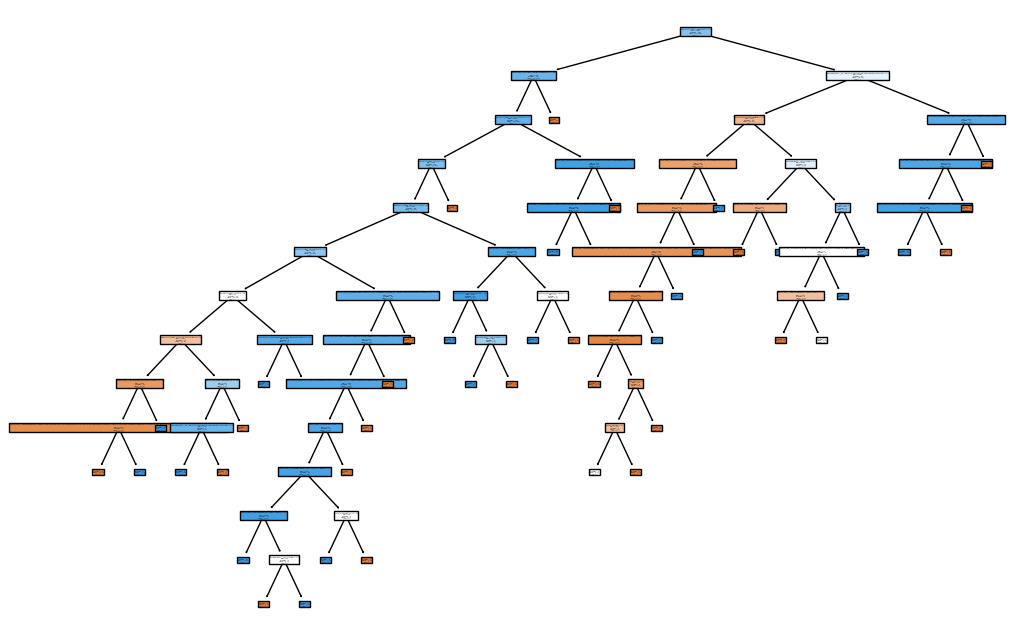

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [ ]:
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
# Print feature importance
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. Feature 12 (0.137504)
2. Feature 30 (0.080782)
3. Feature 186 (0.050300)
4. Feature 25 (0.045422)
5. Feature 108 (0.044543)
6. Feature 14 (0.043125)
7. Feature 23 (0.040853)
8. Feature 17 (0.039788)
9. Feature 157 (0.033084)
10. Feature 26 (0.028499)
11. Feature 15 (0.025140)
12. Feature 112 (0.024657)
13. Feature 209 (0.023998)
14. Feature 61 (0.023726)
15. Feature 4 (0.022918)
16. Feature 120 (0.022855)
17. Feature 5 (0.021998)
18. Feature 159 (0.021911)
19. Feature 82 (0.021767)
20. Feature 215 (0.021633)
21. Feature 99 (0.020432)
22. Feature 210 (0.020085)
23. Feature 16 (0.020010)
24. Feature 121 (0.019874)
25. Feature 191 (0.019327)
26. Feature 181 (0.018310)
27. Feature 57 (0.018218)
28. Feature 63 (0.016760)
29. Feature 74 (0.013408)
30. Feature 218 (0.012570)
31. Feature 1 (0.012570)
32. Feature 7 (0.010774)
33. Feature 208 (0.008380)
34. Feature 3 (0.007237)
35. Feature 0 (0.004190)
36. Feature 8 (0.003352)
37. Feature 94 (0.000000)
38. Feature 69 (0.00000

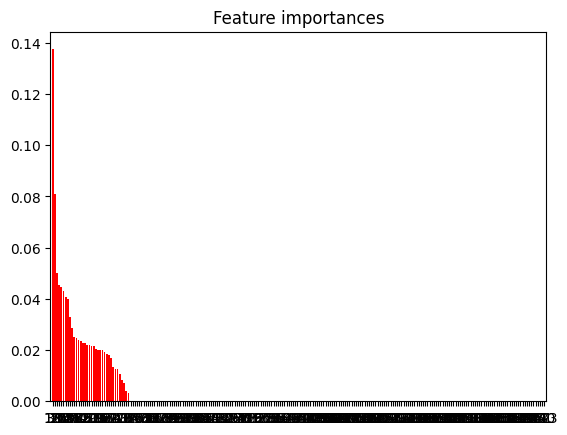

In [ ]:
# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

In [ ]:
# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df.tail()

,Feature,Importance
89,Search_Type__Networking events;Job fairs;Temp ...,0.0
90,Search_Type__Networking events;Professional ne...,0.0
91,Search_Type__Networking events;Professional ne...,0.0
92,Search_Type__Networking events;Professional ne...,0.0
227,Years_of_experience_10.0,0.0


In [ ]:
feature_importance_df.shape

(228, 2)

In [ ]:
feature_importance_df_filtered = feature_importance_df[feature_importance_df['Importance'] != 0.0]

In [ ]:
feature_importance_df_filtered.shape

(36, 2)

<ipython-input-61-3696b3e38113>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted, palette='viridis')
<ipython-input-61-3696b3e38113>:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


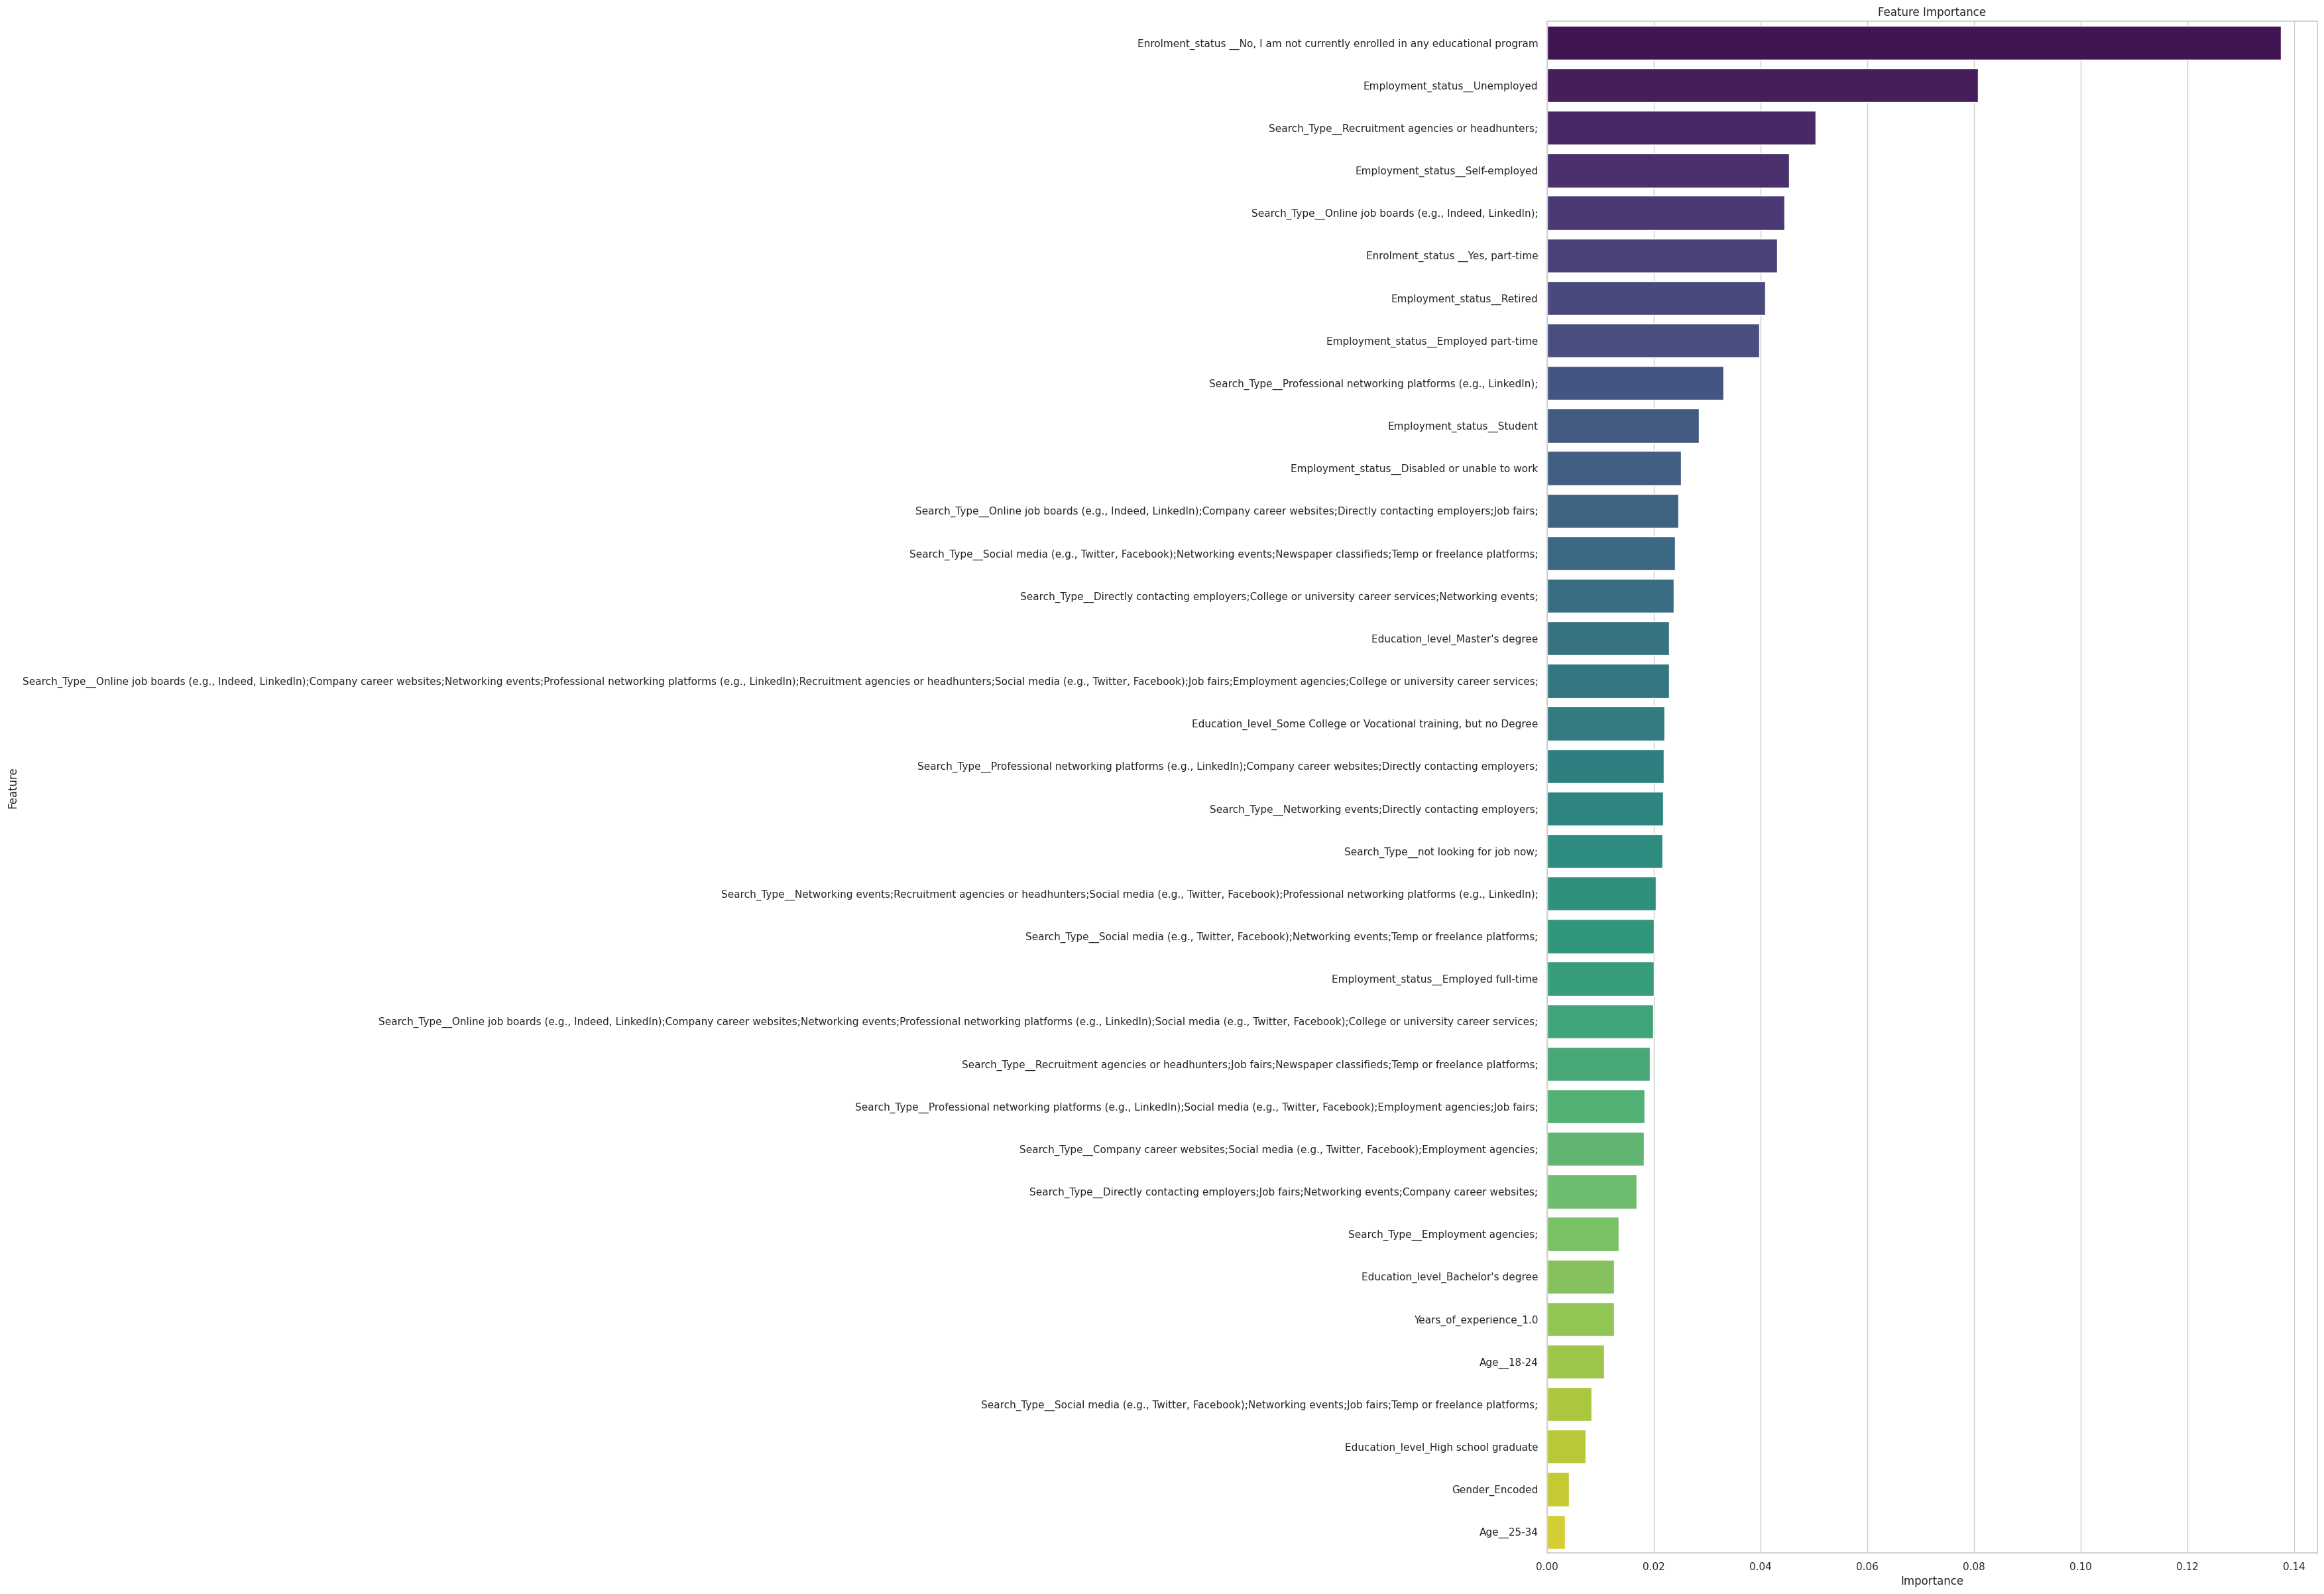

In [ ]:
# Sort the DataFrame by the 'Importance' column in descending order
feature_importance_df_sorted = feature_importance_df_filtered.sort_values(by='Importance', ascending=False)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a larger figure with increased width and height
plt.figure(figsize=(15, 30))  # Adjust width and height as needed

# Create a bar plot with sorted data
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted, palette='viridis')

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=54)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7640449438202247


In [ ]:
# Creating an array as importance_1 for storing the variables in the decreasing order of importance received from the model
importances_1 = rf_classifier.feature_importances_
indices = np.argsort(importances_1)[::-1]

In [ ]:
type(importances_1)

numpy.ndarray

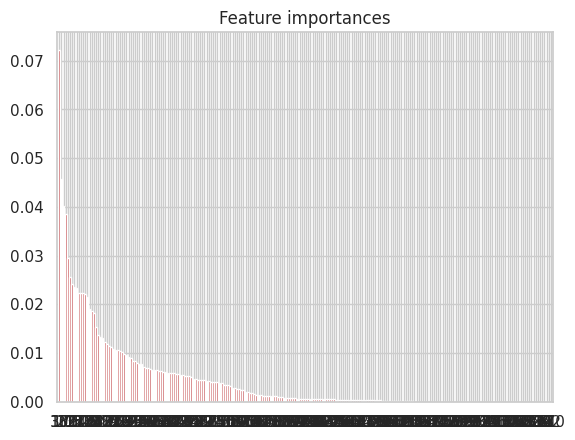

In [ ]:
# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances_1[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Converting the above array as the dataframe to store the features name
feature_importance_df_1 = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances_1})

In [ ]:
# Sort the DataFrame by importance scores in descending order
feature_importance_df_1 = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df_1.shape

(228, 2)

In [ ]:
feature_importance_df_filtered_1 = feature_importance_df_1[feature_importance_df_1['Importance'] != 0.0]

In [ ]:
feature_importance_df_filtered_1.head()

,Feature,Importance
12,"Enrolment_status __No, I am not currently enro...",0.137504
30,Employment_status__Unemployed,0.080782
186,Search_Type__Recruitment agencies or headhunters;,0.050300
25,Employment_status__Self-employed,0.045422
108,"Search_Type__Online job boards (e.g., Indeed, ...",0.044543


In [ ]:
feature_importance_df_filtered_1.shape

(36, 2)

<ipython-input-72-46e959cf9da8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_filtered_1, palette='viridis')
<ipython-input-72-46e959cf9da8>:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


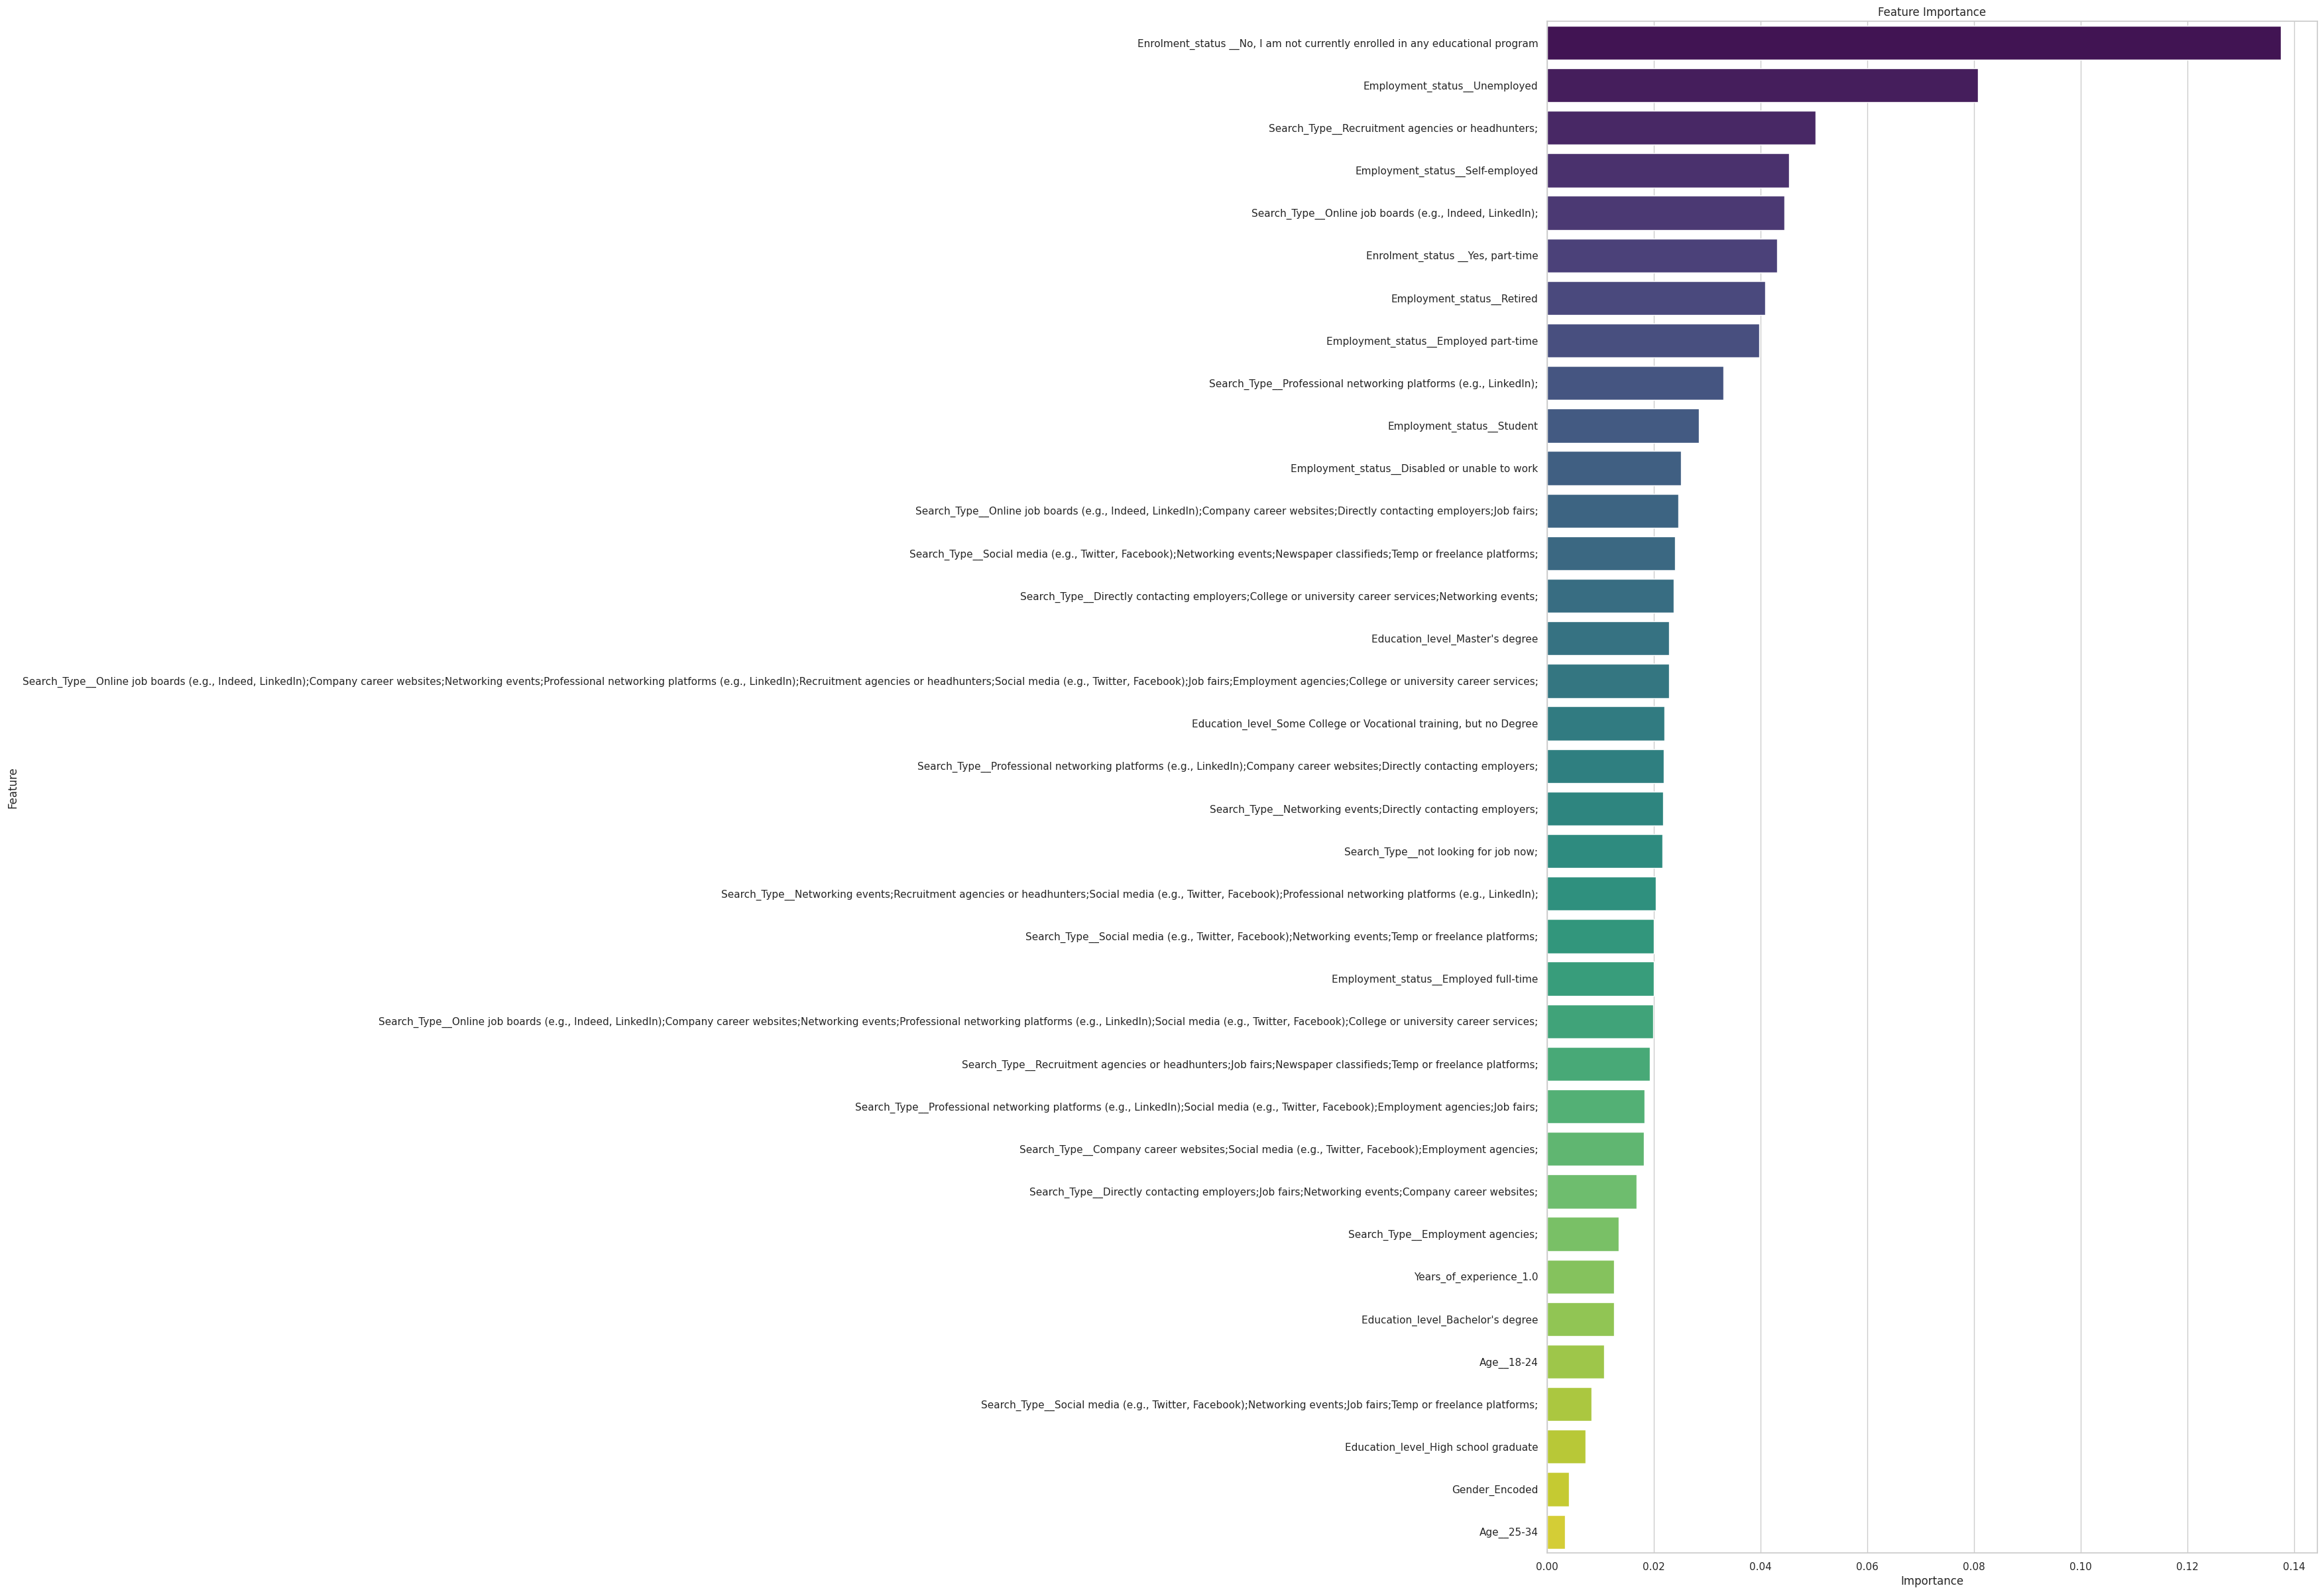

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a larger figure with increased width and height
plt.figure(figsize=(15, 30))

# Create a bar plot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_filtered_1, palette='viridis')

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show plot
plt.tight_layout()
plt.show()